# Unsupervised dimensionality reduction via principal component analysis

While we maintained the original features when we
used feature selection algorithms, such as sequential backward selection, we use feature
extraction to transform or project the data onto a new feature space. 

PCA helps us to identify patterns in data based on the correlation between features. In a nutshell,
PCA aims to find the directions of maximum variance in high-dimensional data and
projects it onto a new subspace with equal or fewer dimensions that the original one. Note that the PCA directions are highly sensitive to data
scaling, and we need to standardize the features prior to PCA if the features were
measured on different scales and we want to assign equal importance to all features

### Total and explained variance

In [3]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

#read data
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

#split dataset into training and test sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                   random_state = 0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
import numpy as np
#find covariance matrix of all features of df_wine dataset
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print ('\nEigenValues \n%s' %eigen_vals)


EigenValues 
[ 4.80831621  2.60374779  1.37087288  0.89730848  0.89417853  0.61503055
  0.52428622  0.09986474  0.36400572  0.1628064   0.30351535  0.23651936
  0.22610515]


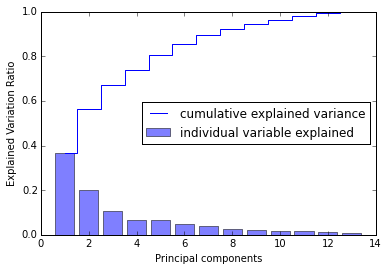

In [6]:
%matplotlib inline
#compute variance and cumulative variance explained by rach eigen value
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

#plt individual and cumulative variance explained by each principal components
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center', 
        label = 'individual variable explained')
plt.step(range(1,14), cum_var_exp, where = 'mid', 
         label = 'cumulative explained variance')
plt.ylabel('Explained Variation Ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

### Feature transformation

In [9]:
#sort eigen pairs by decreasing order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse = True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
              eigen_pairs[1][1][:, np.newaxis]))
print ('Matrix W:\n', w)

Matrix W:
 [[ 0.11764947 -0.48449198]
 [-0.27125589 -0.22537291]
 [-0.00287842 -0.37849214]
 [-0.2187704  -0.00424088]
 [ 0.11381354 -0.29832137]
 [ 0.3883771  -0.08395627]
 [ 0.41798859 -0.03573104]
 [-0.30781073 -0.05530974]
 [ 0.31891453 -0.03466028]
 [-0.09956432 -0.51335364]
 [ 0.31677259  0.21549584]
 [ 0.38268756  0.13494201]
 [ 0.27026597 -0.37608379]]


/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


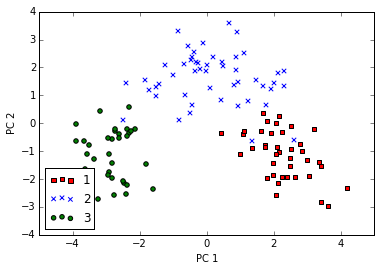

In [15]:
#create a new feature vector from top 2 eigen vectors
X_train_pca = X_train_std.dot(w)

#plot transformed feature set
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
               X_train_pca[y_train==l, 1], 
               c = c, label = l, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

### Principal component analysis in scikit-learn

In [16]:
from matplotlib.colors import ListedColormap

#function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    #set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], 
                   alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c)

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


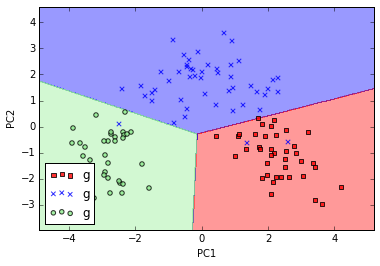

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

#implement PCA using scikit-learn
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#train Logistic Regression model using the PCA features 
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

#plot decision boundary of classifier
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()


/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


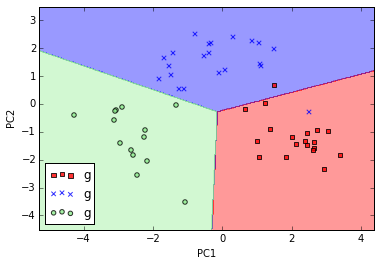

In [19]:
#plot decision regions on test set
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()

In [21]:
#how to get variance explained by each of the principal components
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
print ('Explained variance by each principal compoenent', pca.explained_variance_)
print()
print ('Explained variance ratio by each principal component', pca.explained_variance_ratio_)


Explained variance by each principal compoenent [ 4.76922421  2.58257911  1.35972757  0.89001329  0.88690878  0.6100303
  0.52002373  0.36104632  0.30104774  0.23459644  0.2242669   0.16148277
  0.09905284]

Explained variance ratio by each principal component [ 0.3668634   0.19865993  0.10459443  0.06846256  0.06822375  0.04692541
  0.04000183  0.02777279  0.02315752  0.01804588  0.0172513   0.01242175
  0.00761945]


# Supervised data compression via linear discriminant analysis

Linear Discriminant Analysis (LDA) can be used as a technique for feature
extraction to increase the computational efficiency and reduce the degree of
over-fitting due to the curse of dimensionality in nonregularized models.

The general concept behind LDA is very similar to PCA, whereas PCA attempts to
find the orthogonal component axes of maximum variance in a dataset; the goal in
LDA is to find the feature subspace that optimizes class separability. Both LDA and
PCA are linear transformation techniques that can be used to reduce the number of
dimensions in a dataset; the former is an unsupervised algorithm, whereas the latter is
supervised.

We might intuitively think that LDA is a superior feature extraction
technique for classification tasks compared to PCA. However, preprocessing via PCA tends to result in better classification results in an image
recognition task in certain cases, for instance, if each class consists of only a small
number of samples. 

One assumption in LDA is that the data is normally distributed. Also, we assume
that the classes have identical covariance matrices and that the features are
statistically independent of each other. However, even if one or more of those
assumptions are slightly violated, LDA for dimensionality reduction can still work
reasonably well. 

### Computing the scatter matrices

In [23]:
#Compute mean vector - mean of feature columns for each class label
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
    print ('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9378 -0.315   0.4122 -0.7469  0.4418  0.8602  0.9525 -0.5553  0.5883
  0.2441  0.5306  0.7983  1.1974]

MV 2: [-0.8581 -0.4025 -0.5427  0.1785 -0.3325 -0.0059  0.0816 -0.1085  0.095
 -0.8547  0.3863  0.2486 -0.6721]

MV 3: [ 0.1861  0.9532  0.3254  0.5943 -0.0178 -0.978  -1.2126  0.7965 -0.8146
  0.977  -1.1766 -1.2813 -0.3851]



In [24]:
#compute within-class scatter matrix
d = 13 #number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X[y == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print ('Within class scatter matrix: %sX%s' %(S_W.shape[0], S_W.shape[1]))

Within class scatter matrix: 13X13


In [27]:
#look at the distribution of class labels across all observations
print ('Class label distribution: %s' %np.bincount(y_train)[1:])

Class label distribution: [39 50 34]


In [28]:
#compute scaled within_class scatter matrix
d = 13 #number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print ('Scaled within-class scatter matrix: %sx%s' %(S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [30]:
#compute between class scatter matrix
mean_overall = np.mean(X_train_std, axis = 0)
d = 13 #number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X[y == i+1, :].shape[0]
    mean_vev = mean_vec.reshape(d, 1)
S_B += n *(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print ('Between-class scatter matrix: %sx%s' %(S_B.shape[0], S_W.shape[1]))

Between-class scatter matrix: 13x13


### Selecting linear discriminants for the new feature subspace

In [65]:
#compute eigen values and eigen vectors 
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#create eigen_vec-eigen_vals pairs
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print ('Eigenvalues in decreasing order: \n')
for i in eigen_pairs:
    print (i[0])

Eigenvalues in decreasing order: 

3131.727969
1.00377066438e-13
1.00183051831e-13
5.09275743127e-14
5.09275743127e-14
3.90269846724e-14
3.15966668877e-14
3.15966668877e-14
1.90284108847e-14
1.90284108847e-14
9.87660614904e-16
9.87660614904e-16
0.0


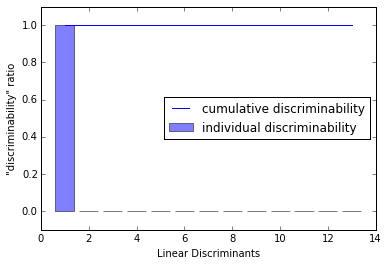

In [67]:
#compute the individual and cumulative sum of class discrimination captured by each eigen vector
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha = 0.5, align = 'center', 
       label = 'individual discriminability')
plt.step(range(1, 14), cum_discr, where = 'mid', 
        label = 'cumulative discriminability')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc = 'best')
plt.show()

In [68]:
#create transformation matrix W from the most discriminative eigen vector colum
w = eigen_pairs[0][1][:, np.newaxis].real
print ('Matrix W:\n', w)

Matrix W:
 [[-0.1608]
 [-0.2638]
 [ 0.0438]
 [-0.0093]
 [-0.1718]
 [ 0.1851]
 [-0.4369]
 [-0.2971]
 [-0.0072]
 [-0.2321]
 [-0.3377]
 [-0.553 ]
 [-0.2932]]


### Projecting samples onto the new feature space

In [71]:
#compute new feature vector X
# X_train_lda = X_train_std.dot(w)

# #plot the lda
# colors = ['r', 'b', 'g']
# markers = ['s', 'x', 'o']
# for l, c, m in zip(np.unique(y_train), colors, markers):
#     plt.scatter(X_train_lda[y_train == l, 0], c = c, label = l, 
#                marker = m)
# plt.xlabel('LD 1')
# plt.legend(loc = 'upper right')
# plt.show()

### LDA via scikit-learn

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


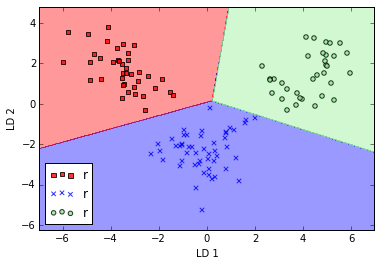

In [72]:
from sklearn.lda import LDA

#implement LDA using scikit
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

#train logistic regression model on transformed X_train
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

#plot decision regions
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


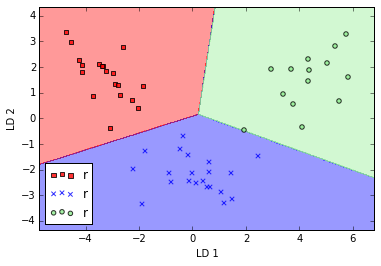

In [73]:
#Plot decision regions for test dataset
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

In [74]:
lr.predict(X_test_lda)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 1,
       3, 2, 3, 1, 3, 3, 1, 3])

# Using kernel principal component analysis for nonlinear mappings 

### Kernel functions and the kernel trick

### Implementing a kernel principal component analysis in Python

In [22]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF Kernel PCA Implementation
    
    Parameters
    ----------
    X : Numpy ndarray of shape = [n_samples, n_features]
    
    gamma : float
        Tuning parameter of RBF kernel
        
    n_components: int
        Number of principal components to return
        
    Returns
    -------
    X_pc : Numpy ndarray of shape = [n_samples, k_features]
        Projected dataset
    """
    
    #Calculate pairwise squared Euclidean distance
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    #Compute symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtain eigenpairs from the centered kernel matrix
    eigvals, eigvecs = eigh(K)
   
    #Collect top k eigenvectors and return them
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    return X_pc
    
    

### Example 1 – separating half-moon shapes

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


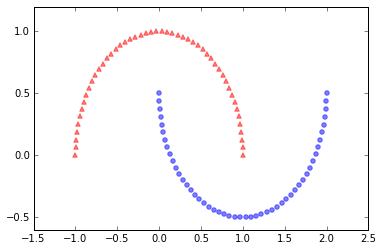

In [14]:
%matplotlib inline

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
#create a non linear data set
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
           color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


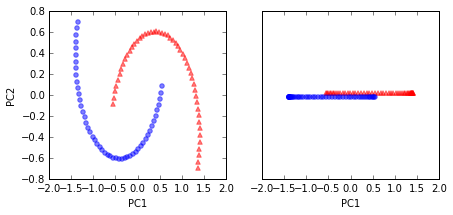

In [15]:
from sklearn.decomposition import PCA

#Find principal components of the original feature vector
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^', 
             alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', 
             alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0],np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


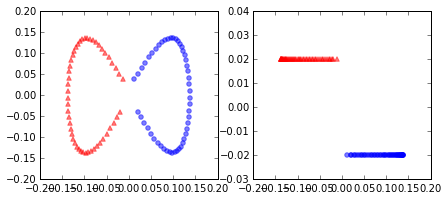

In [23]:
from matplotlib.ticker import FormatStrFormatter

#find kernel based PCAs
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', 
             alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', 
             alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', 
             alpha = 0.5)


### Example 2 – separating concentric circles

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


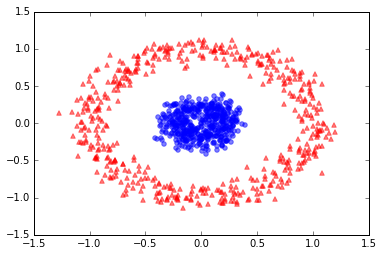

In [24]:
from sklearn.datasets import make_circles

#create and plot data
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


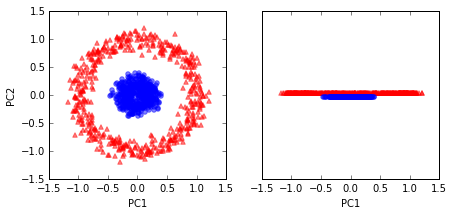

In [27]:
#find principal componenets without any kernel trick
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^', 
             alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', 
             alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


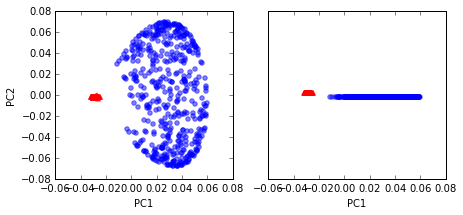

In [28]:
#find kernel based principal components of feature vector
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', 
             alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', 
             alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', 
             alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

### Projecting new data points

Kernel PCA, in contrast
to standard PCA, is a memory-based method, which means that we have to reuse
the original training set each time to project new samples. We have to calculate the
pairwise RBF kernel (similarity) between each i th sample in the training dataset and
the new sample x′

In [29]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF Kernel PCA Implementation
    
    Parameters
    ----------
    X : Numpy ndarray of shape = [n_samples, n_features]
    
    gamma : float
        Tuning parameter of RBF kernel
        
    n_components: int
        Number of principal components to return
        
    Returns
    -------
    X_pc : Numpy ndarray of shape = [n_samples, k_features]
        Projected dataset
    """
    
    #Calculate pairwise squared Euclidean distance
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    #Compute symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtain eigenpairs from the centered kernel matrix
    eigvals, eigvecs = eigh(K)
   
    #Collect top k eigenvectors and return them
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    #Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components+1)]
    
    return alphas, lambdas
    

In [31]:
#project new half-moon dataset onto one-dimensional subspace
X, y = make_moons(n_samples = 100, random_state = 123)
alphas, lambdas = rbf_kernel_pca(X, gamma = 15, n_components = 1)

x_new = X[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [33]:
x_proj = alphas[25]
print (x_proj)

[ 0.07877284]


In [38]:
def projected_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas/lambdas)

In [39]:
x_reproj = projected_x(x_new, X, gamma = 15, alphas = alphas, lambdas = lambdas)
print (x_reproj)

[ 0.07877284]


/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


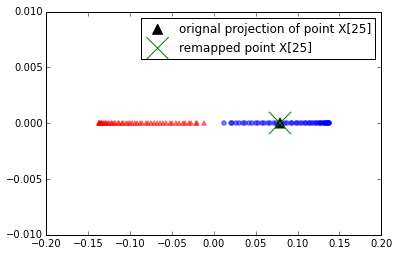

In [41]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)), color = 'red', marker = '^', alpha = 0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)), color = 'blue', marker = 'o', alpha = 0.5)
plt.scatter(x_proj, 0, color = 'black', label = 'orignal projection of point X[25]', 
           marker = '^', s = 100)
plt.scatter(x_reproj, 0, color = 'green', label = 'remapped point X[25]', marker = 'x', 
           s = 500)
plt.legend(scatterpoints = 1)
plt.show()

# Kernel principal component analysis in scikit-learn

In [42]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples = 100, random_state = 123)
scikit_kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
X_skernpca = scikit_kpca.fit_transform(X)

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


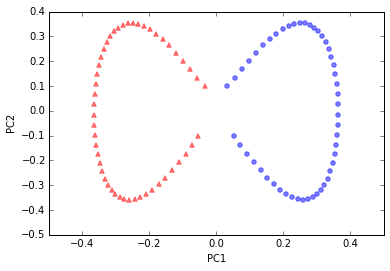

In [43]:
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1], color = 'red', 
            marker = '^', alpha = 0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1], color = 'blue', 
           marker = 'o', alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

 You can find a nice overview of the current
implementations in scikit-learn complemented with illustrative
examples at http://scikit-learn.org/stable/
modules/manifold.html.